<h1>Project 5 - Communicate Data Findings </h1>

This project will examine the Prosper Loans Data by exmining the datset, visualising it and looking for trends/patterns and useful or interesting information. We carry out univariate, bivariate and multivariate exploration.

The dataset is found: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000

The dataset variables are explained here: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

[Part 1: Clean the data](#P1CTD)

[Part 2: Visualise the data](#P2VTD)

[1) Univariate Analysis](#UA)


[2) Bivariate Analysis](#BA)


[3) Multivariate Analysis](#MA)








In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm



<a id="P1CTD"></a>

<h2>Part 1: Clean the data </h2>

In [2]:
df = pd.read_csv('prosperloandata.csv')

<b>Copying the data - in case I need to refer to the original data if something goes wrong in the cleaning process </b>

In [3]:
df_cle=df.copy()

<b>Visually displaying the data to view how the table and columns are set up </b>

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


<b> Use the describe method for this to show basic statistics for the numerical columns below: </b>


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#Looking at the datatypes
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

<b> Looking at the number of Rows and columns using the shape method below: </b>


In [7]:
df.shape

(113937, 81)

<b> Looking for duplicated listing keys below (as these should be unique values, with Unique key being the same value as the 'key' used in the listing object in the API)  - There are 889. </b>


In [8]:
df.ListingKey.duplicated().sum()

889

<b>I will delete the duplicate values</b>

In [9]:
df = df.drop_duplicates(subset="ListingKey")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


<b> Looking for Null values below </b>  

In [10]:
#Looking for Null values - there are 
df.isna().sum().sum()

1354429

<b> There are 1354429 - so I need to explore which columns have many null values in </b> 


In [11]:
df.isnull().sum().nlargest(20)

GroupKey                               99714
LoanFirstDefaultedCycleNumber          96097
ScorexChangeAtTimeOfListing            94140
TotalProsperLoans                      91129
TotalProsperPaymentsBilled             91129
OnTimeProsperPayments                  91129
ProsperPaymentsLessThanOneMonthLate    91129
ProsperPaymentsOneMonthPlusLate        91129
ProsperPrincipalBorrowed               91129
ProsperPrincipalOutstanding            91129
CreditGrade                            84101
ClosedDate                             57981
EstimatedEffectiveYield                29078
EstimatedLoss                          29078
EstimatedReturn                        29078
ProsperRating (numeric)                29078
ProsperRating (Alpha)                  29078
ProsperScore                           29078
DebtToIncomeRatio                       8470
EmploymentStatusDuration                7623
dtype: int64

<b>As we can see there are rows with lots of null values so I will get rid off any with more than 10% null values in.</b>

In [12]:
#https://moonbooks.org/Articles/How-to-filter-missing-data-NAN-or-NULL-values-in-a-pandas-DataFrame-/

In [13]:
column_with_nan = df.columns[df.isnull().any()]


In [14]:
df_shape = df.shape

In [15]:
for column in column_with_nan:
    print(column, df[column].isnull().sum())

CreditGrade 84101
ClosedDate 57981
BorrowerAPR 25
EstimatedEffectiveYield 29078
EstimatedLoss 29078
EstimatedReturn 29078
ProsperRating (numeric) 29078
ProsperRating (Alpha) 29078
ProsperScore 29078
BorrowerState 5514
Occupation 3527
EmploymentStatus 2253
EmploymentStatusDuration 7623
GroupKey 99714
CreditScoreRangeLower 591
CreditScoreRangeUpper 591
FirstRecordedCreditLine 697
CurrentCreditLines 7602
OpenCreditLines 7602
TotalCreditLinespast7years 697
InquiriesLast6Months 697
TotalInquiries 1158
CurrentDelinquencies 697
AmountDelinquent 7620
DelinquenciesLast7Years 990
PublicRecordsLast10Years 697
PublicRecordsLast12Months 7602
RevolvingCreditBalance 7602
BankcardUtilization 7602
AvailableBankcardCredit 7542
TotalTrades 7542
TradesNeverDelinquent (percentage) 7542
TradesOpenedLast6Months 7542
DebtToIncomeRatio 8470
TotalProsperLoans 91129
TotalProsperPaymentsBilled 91129
OnTimeProsperPayments 91129
ProsperPaymentsLessThanOneMonthLate 91129
ProsperPaymentsOneMonthPlusLate 91129
Prosper

In [16]:
for column in column_with_nan:
     if df[column].isnull().sum()*100.0/df_shape[0] > 10:
             df.drop(column,1, inplace=True)

In [17]:
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,36,Completed,0.16516,0.158,0.138,0,CO,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,36,Current,0.12016,0.092,0.082,2,CO,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,36,Completed,0.28269,0.275,0.240,0,GA,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


<b>We can see that there are 63 columns so the 18 with more than 10% of null values have been successfully removed</b>

In [18]:
#Looking at the datatypes
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
Term                             int64
LoanStatus                      object
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 63, dtype: object

In [19]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

<a id="P2VTD"></a>

<h2>Part 2: Visualise the data </h2>

<a id="UA"></a>

<h3> Univariate Analysis </h3>

In [20]:
#setting the size of the seaborn graphs
sns.set(rc={'figure.figsize':(18.7,13.27)})


<b> Examining Loan Status: what does the distribution of loans look like?</b>

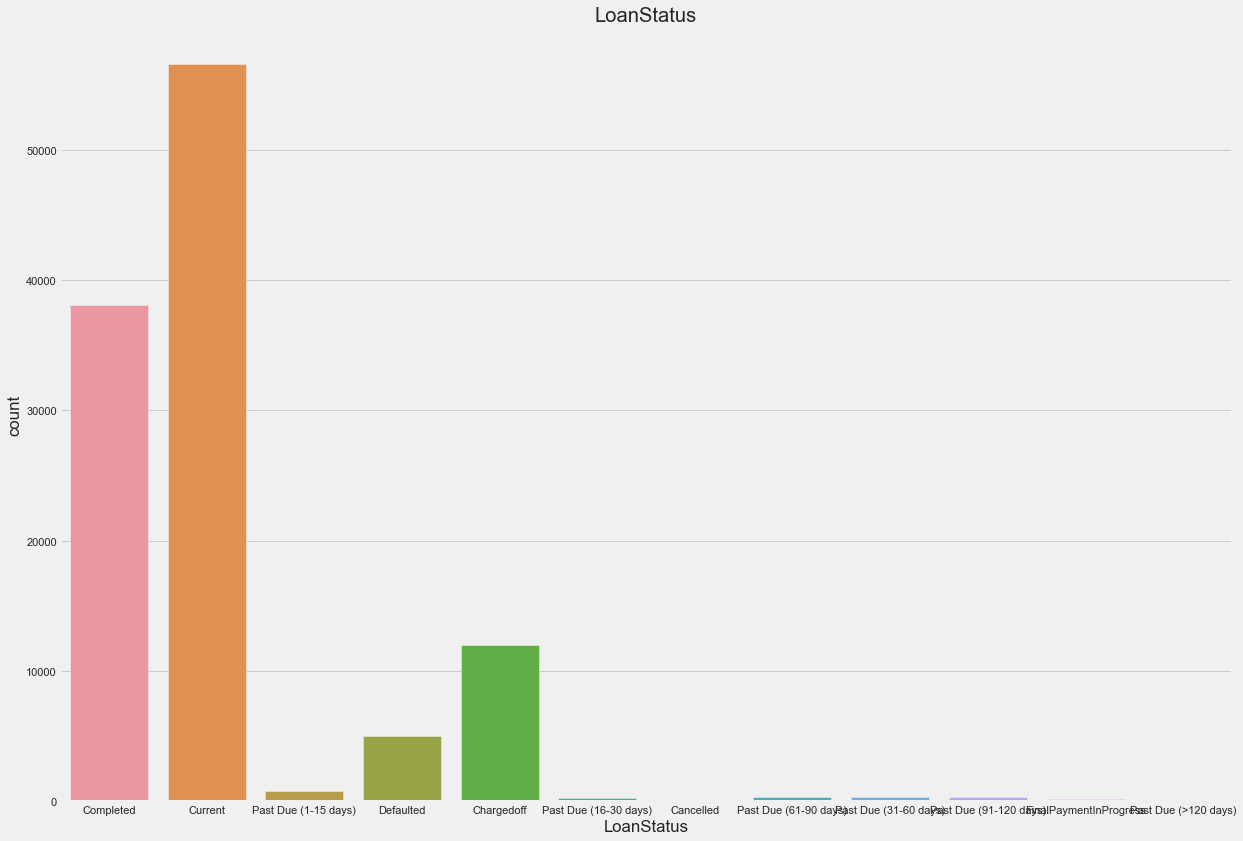

In [101]:
sns.countplot(x="LoanStatus", data=df).set(title='LoanStatus');

In [22]:
df["LoanStatus"].value_counts()

Current                   55721
Completed                 38053
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

<b> We can see it's difficult to assess those 'Past Due' on this graph as they are so small in comparison, so I will make a separeate table fot them by filtering out values of less than 5,000. </b>

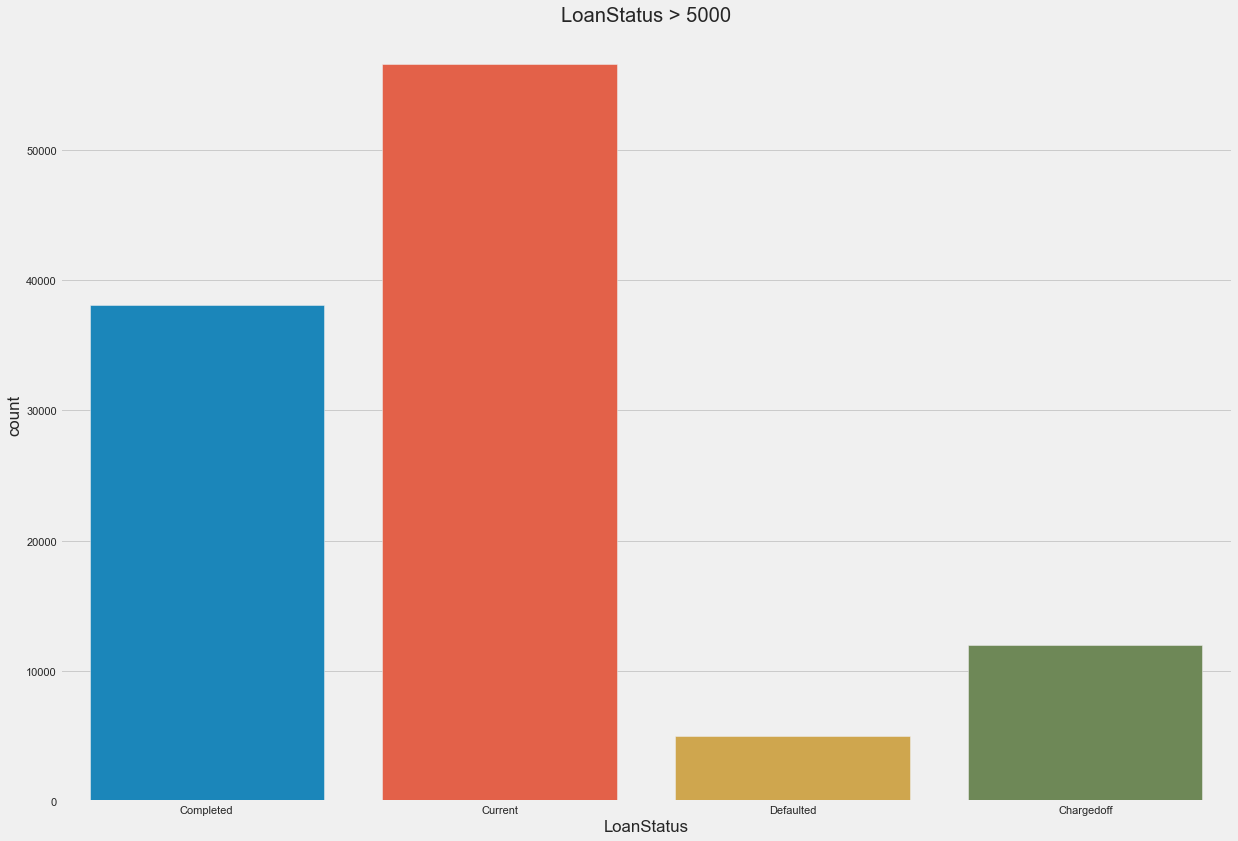

In [99]:
counts = df["LoanStatus"].value_counts()

counts_df_above_5k = df.loc[df["LoanStatus"].isin(counts.index[counts > 5000])]

sns.countplot(x="LoanStatus", data=counts_df_above_5k).set(title='LoanStatus > 5000');

<b>We can see that around 38k loans in the dataset have come to their natural end/are completed. Around 56k are 'Current' (I.e still being paid back). 5k defaulted (failed to pay back)  and 12k are 'Chargedoff' (a charge-off or chargeoff is a declaration by a creditor that an amount of debt is unlikely to be collected).

Therefore around 15.3% of the total loans have either defaulted or paid less than the total value of the loan, with this number expected to increase, as the majority of loans are still 'current' so have the potential to not pay in full. </b>

<b>We will now explore those below with below 5,000: </b>

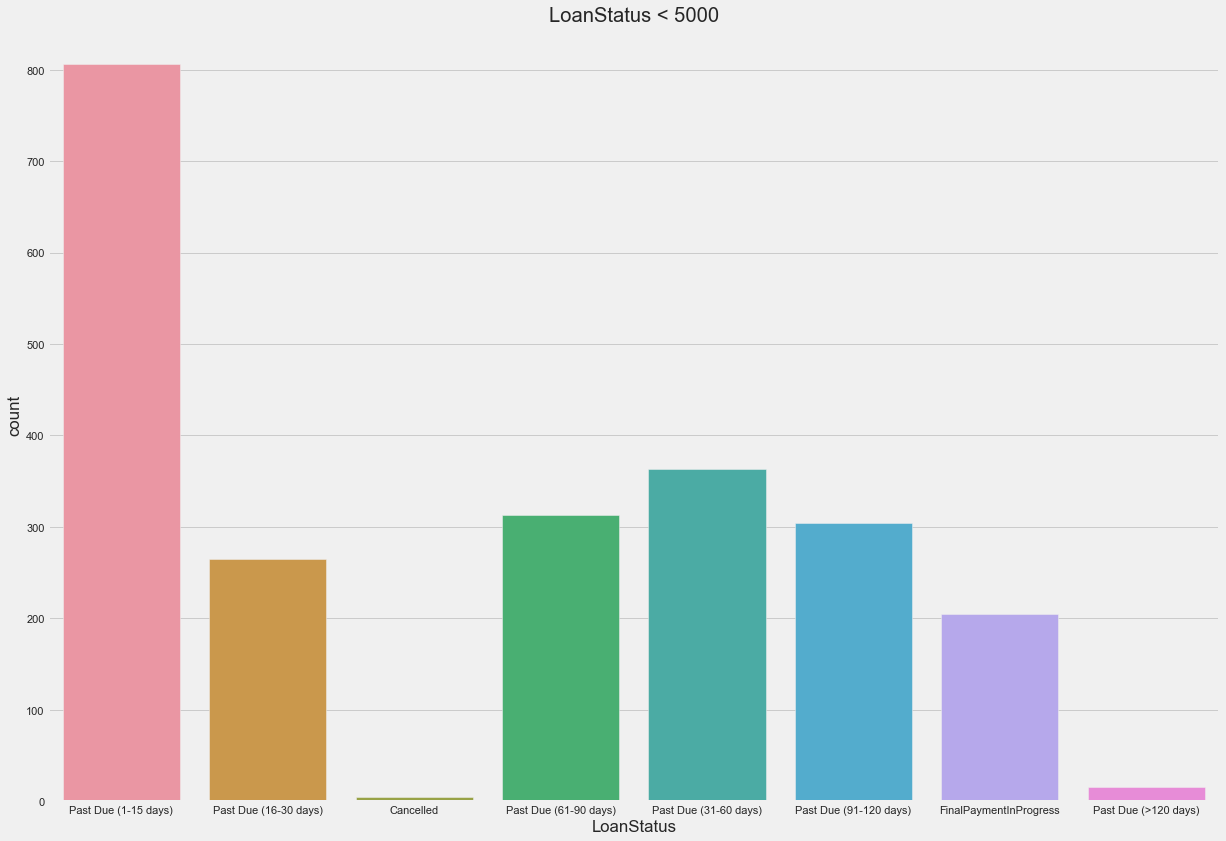

In [100]:
counts = df["LoanStatus"].value_counts()

counts_df_under_5k = df.loc[df["LoanStatus"].isin(counts.index[counts < 5000])]

sns.countplot(x="LoanStatus", data=counts_df_under_5k).set(title='LoanStatus < 5000');

In [25]:
#adding up all the values
800+361+311+304+265+ 203+16+ 5

2265

In [26]:
counts_df_under_5k['LoanStatus'].value_counts()

Past Due (1-15 days)      800
Past Due (31-60 days)     361
Past Due (61-90 days)     311
Past Due (91-120 days)    304
Past Due (16-30 days)     265
FinalPaymentInProgress    203
Past Due (>120 days)       16
Cancelled                   5
Name: LoanStatus, dtype: int64

<b> We can see that for those past due, the majority(at 800) are only between 1-15 days, then there is a large reduction between this and the other Past Due dates, suggesting that most people who fall behind get out of it (either by paying or defaulting or being charged-off). </b>

<b>Examining Borrower APR</b>

As the column is a decimal percentage value, I will multiply all values by 100 to get the absolute percentage value (I.e 20 instead of 0.2) and show it as a graph. And to do that I will use a function.

In [27]:
#defining the function

def percentage(original):
    percent = (original*100).plot.hist()
    plt.xlabel('Interest Rate')

    plt.ylabel('Frequency')
    plt.grid()
    return percent

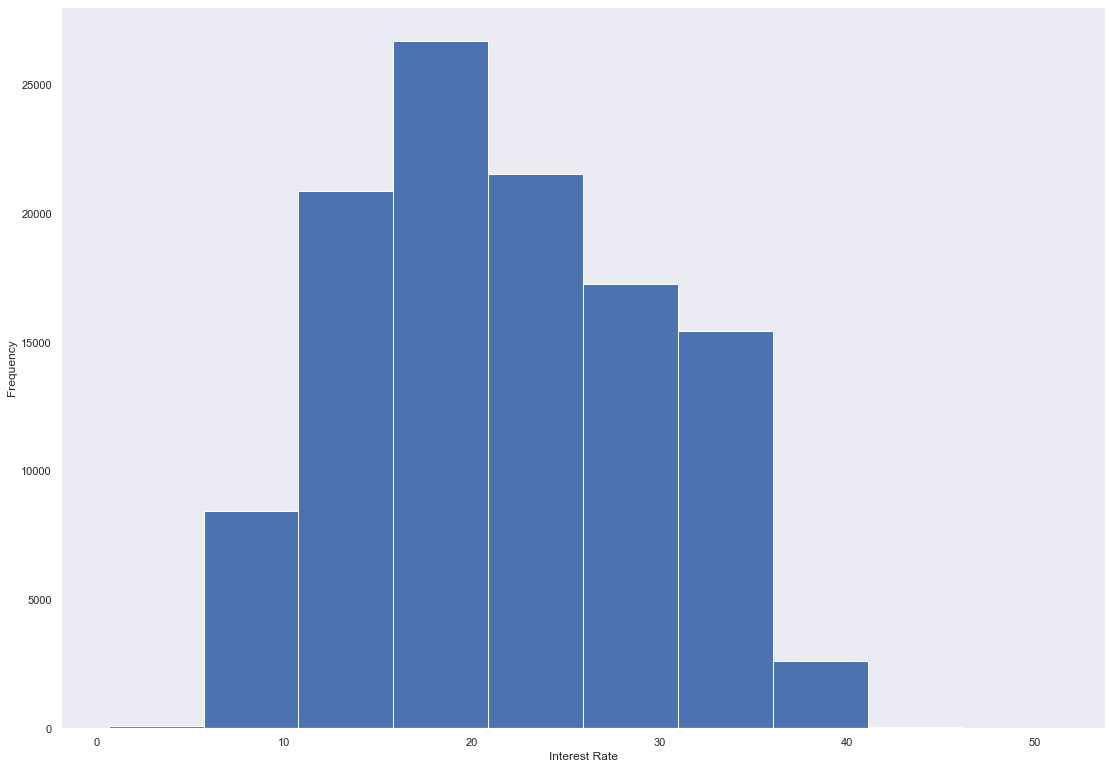

In [28]:
percentage(df["BorrowerAPR"])

In [29]:
df["BorrowerAPR"].mean()

0.21898000964401765

In [30]:
df["BorrowerAPR"].median()

0.20984

<b> We can see that Borrower APR, which is defined as 'The Borrower's Annual Percentage Rate (APR) for the loan' is quite normally distributed roughly following a bell curve shape with a peak around 20%, which must be standard for the most common customer Prosper credit score. This is confirmed with both the mean and median being very close to this value(21.9% and 21.0%).  </b>


<b> Now I will now explore Borrower Rate </b>

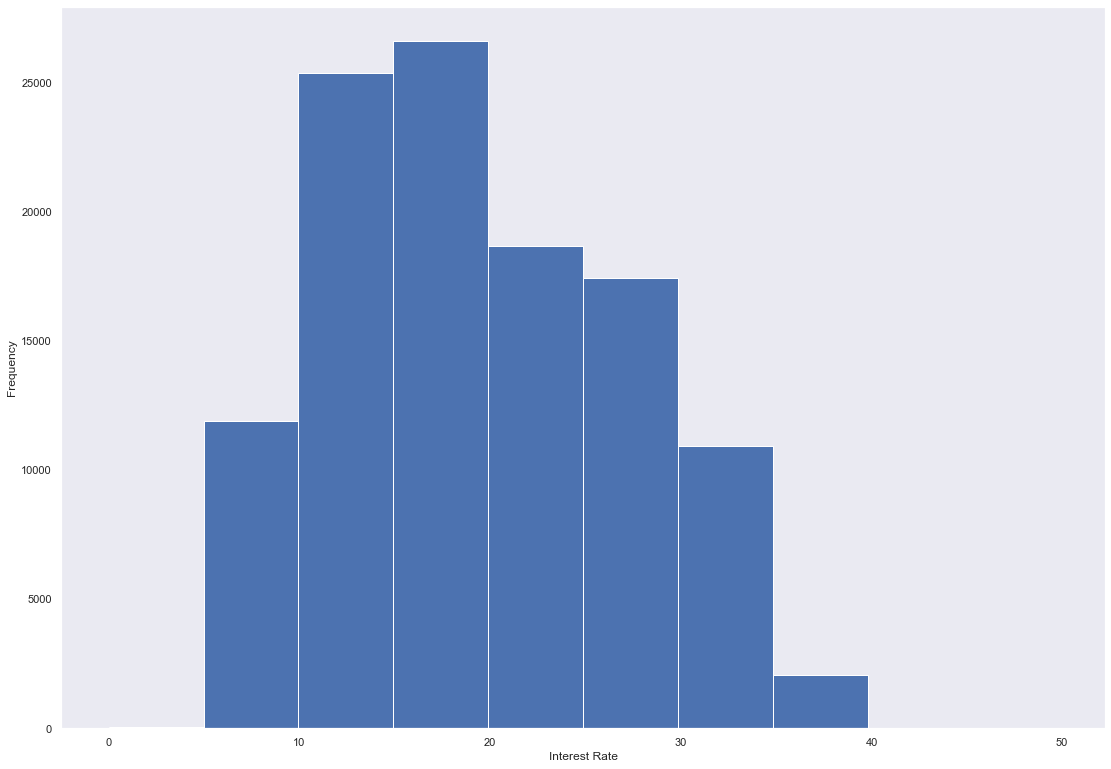

In [31]:
percentage(df["BorrowerRate"])

In [32]:
df["BorrowerRate"].mean()

0.1929452493630874

In [33]:
df["BorrowerRate"].median()

0.184

We can see that The Borrower's actual interest rate for this loan was very similar but around 5% less(as shown by the lower median and mean) on average. It is unclear why this differs from the data.


<b> Exploring the Stated Monthly Income Variable </b>

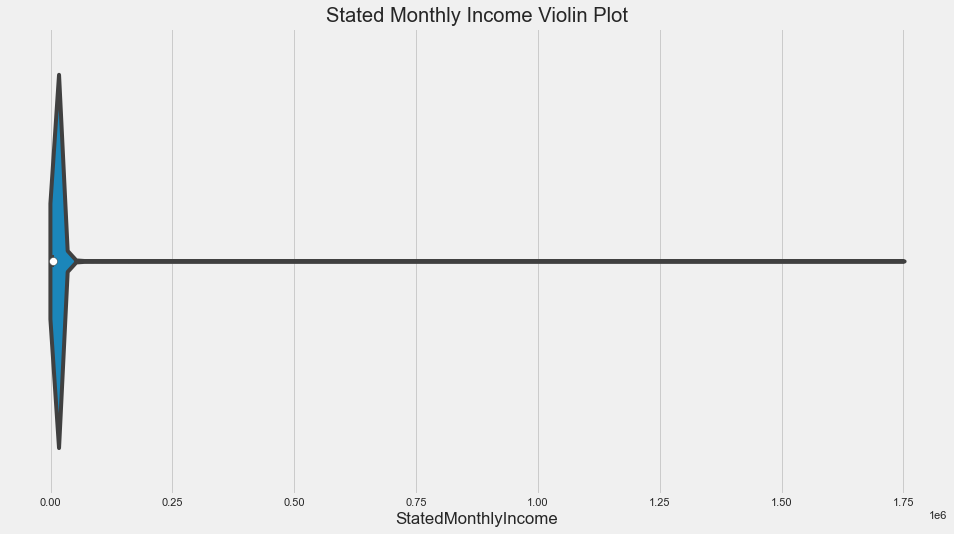

In [89]:
plt.figure(figsize=(15, 8))

sns.violinplot(data=df, x="StatedMonthlyIncome").set(title='Stated Monthly Income Violin Plot');

<b> We can see from the violin plot that Stated Monthly income is a Log-normal distribution which shows that there are some extreme outliers in this data, but most are distributed closer together on the lower end of this scale. We should therefore be careful to remove the outliers when analysing this value later on. </b>


<a id="BA"></a>

<h3> Bivariate Analysis </h3>

<b>Lender Yeild Vs Borrower APR: Is there a linear relationship between the interest charged to the borrower (Borrower APR) and the Lender Yeild (I.e profit off the loan). I would expect there to be as more interest means more income for the bank, but it could be offset by higher service fees. </b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


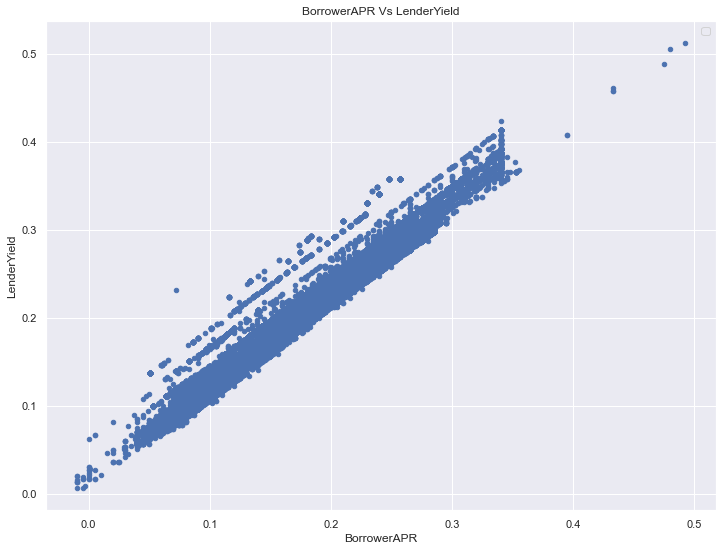

In [35]:
df.plot(x ='LenderYield', y='BorrowerAPR', kind = 'scatter', figsize=(12,9))


plt.xlabel('BorrowerAPR')
# Set the y axis label of the current axis.
plt.ylabel('LenderYield')
#Set title
plt.title('BorrowerAPR Vs LenderYield')

plt.legend()

<b> We can see that the higher the Borrower APR is, the higher the lender yeild is, suggesting that any rise in service fee is compensated for by the higher interest. However we will explore whether the higher interest rate is associated with higher defaults.</b>

I have now noticed that the Estimated Loss column which was orignally moved due to high amounts of null values was actually jsut null on the completed loans, so I will now use the clean dataframe to analyse for the current loans if the higher APR, the higher the expected loss.

<b>Estimated Loss Vs Borrower APR: Is there a linear relationship between the Estimated loss and Higher APR of the loan? </b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


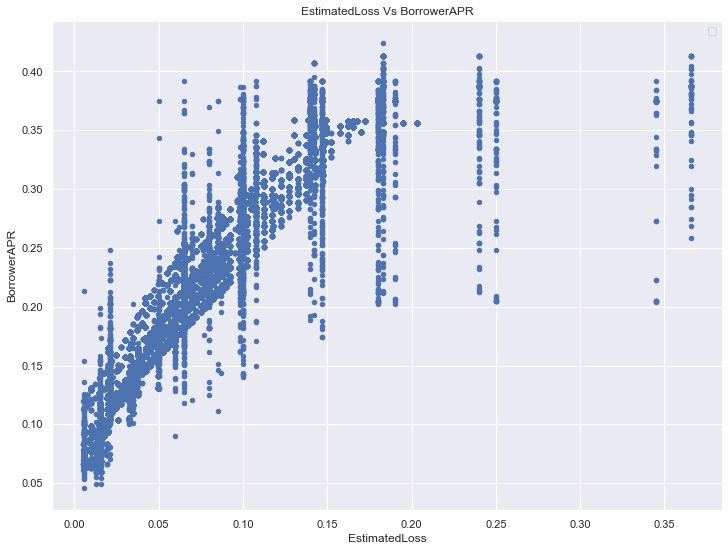

In [36]:
df = pd.read_csv('prosperloandata.csv')
df.plot(x ='EstimatedLoss', y='BorrowerAPR', kind = 'scatter', figsize=(12,9))


plt.xlabel('EstimatedLoss')
# Set the y axis label of the current axis.
plt.ylabel('BorrowerAPR')
#Set title
plt.title('EstimatedLoss Vs BorrowerAPR')

plt.legend()

<b> There is a less linear relationship with estimated losses and Borrower APR, however it does look like there is some trend as we would expect the higher APR loans to be given to higher risk customers which would give a bigger overall loss (but this could have just as easily lead to more profit from the higher rate of those performing loans).  </b>

<b>Estimated Return Vs Borrower APR </b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


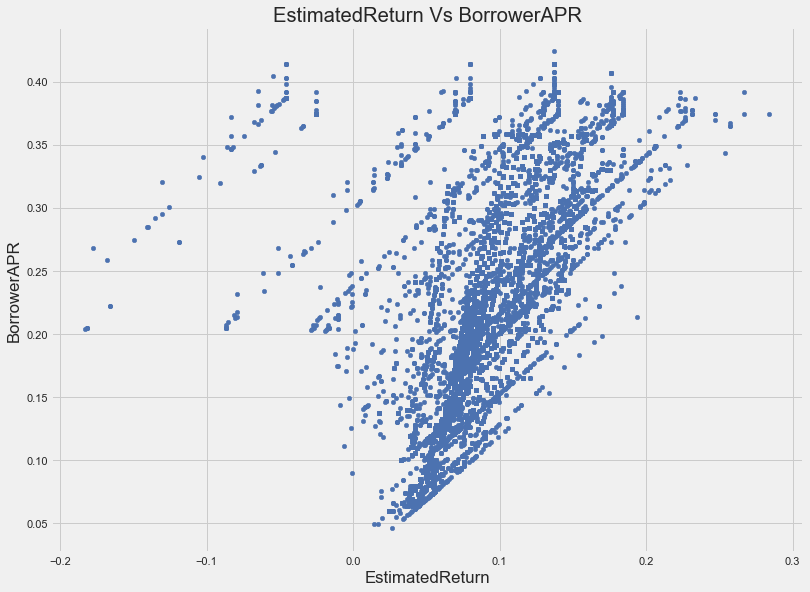

In [92]:

df.plot(x ='EstimatedReturn', y='BorrowerAPR', kind = 'scatter', figsize=(12,9))


plt.xlabel('EstimatedReturn')
# Set the y axis label of the current axis.
plt.ylabel('BorrowerAPR')
#Set title
plt.title('EstimatedReturn Vs BorrowerAPR');

<b> There is no linear relationship with Estimated Return a Borrower's APR. This should be expected as those with a higher APR are more risky so default losses wipe out the higher profit from the Interest Rate, and the safer loans which do not defaault as much, this is factored in with a lower Interest Rate which wipes out the return from that. So overall the loans will be valued based on their risk which stops those with higher/lower interest rates having a higher/lower return.</b>

<b>Next I will visualise the Prosper Rating/Borrower APR Data. I would expect the Borrower APR to decrease as the rating goes up because they are less risky (and so given the cheaper rate). </b>

In [87]:
plt.style.use("fivethirtyeight")
df_viz = df[["ProsperRating (numeric)", "BorrowerAPR"]].dropna()

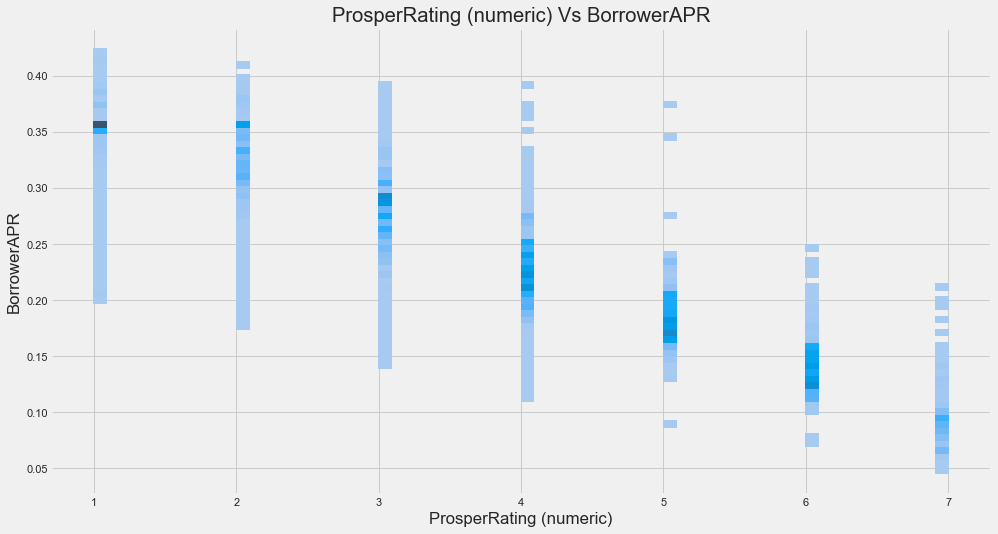

In [88]:
plt.figure(figsize=(15, 8))

sns.histplot(data=df_viz, x="ProsperRating (numeric)", y="BorrowerAPR").set(title='ProsperRating (numeric) Vs BorrowerAPR');

<b> We can see that this is the case as the darker parts are more 'dense' with more people there, and so we can see the downwards decrease in the overall bar and darker middle parts clearly on this graph. </b>

<b>Next I will look at how borrower APR is distributed across different Employment statuses. I would expect Employed and Full-time to have the lowest APR as they would in my opion be the less risky options. </b>

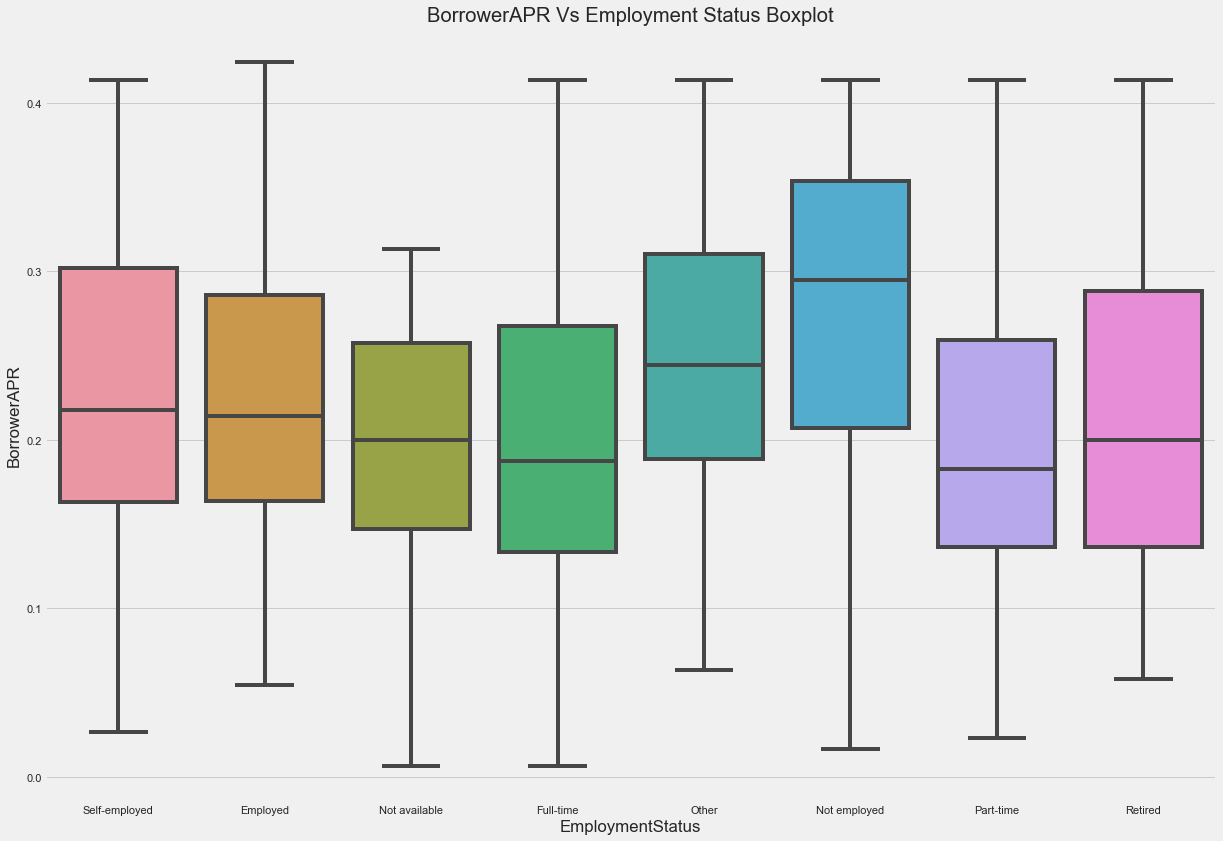

In [86]:


df_viz = df[["BorrowerAPR", "EmploymentStatus"]].dropna()

sns.boxplot(data=df_viz, x="EmploymentStatus", y="BorrowerAPR").set(title='BorrowerAPR Vs Employment Status Boxplot');

<b> We can see that Full-time and Employed do in fact have the lowest median APR, and they have a lower box plot showing left skewed distribution (I.e most of the values are below the mean) so have have lower APR's.
    
Full-time has the biggest interquartile range which we would expect as the most common type of employment so will likely have the widest range of values.</b> 

<h3> Multivariate Exploration</h3>

<a id="MA"></a>

<b>Correlations: Which factors are correlated and what could the reason(s) be? </b>

In [41]:
df.columns.tolist()

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [42]:
#Remove columns we don't need for correlations
corr_cols_to_remove = ["ListingKey", "ListingNumber", "ListingCreationDate", "LoanStatus",
                 "Occupation", "LoanKey", 'ListingCategory (numeric)']

In [43]:
df_corrs_pre = df.drop(corr_cols_to_remove, axis=1)


In [44]:

df_corrs = df_corrs_pre.corr()
df_corrs

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,0.082476,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,-0.008589,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,-0.019907,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,-0.018954,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
EstimatedEffectiveYield,0.057047,0.895635,0.895282,0.895343,1.000000,0.798135,0.801568,-0.848394,-0.632003,-0.023315,...,0.058309,-0.068708,0.139421,0.138712,0.049014,-0.043366,-0.046694,-0.063848,-0.038146,-0.265244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,0.000998,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,-0.039404,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,-0.031432,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,-0.020823,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


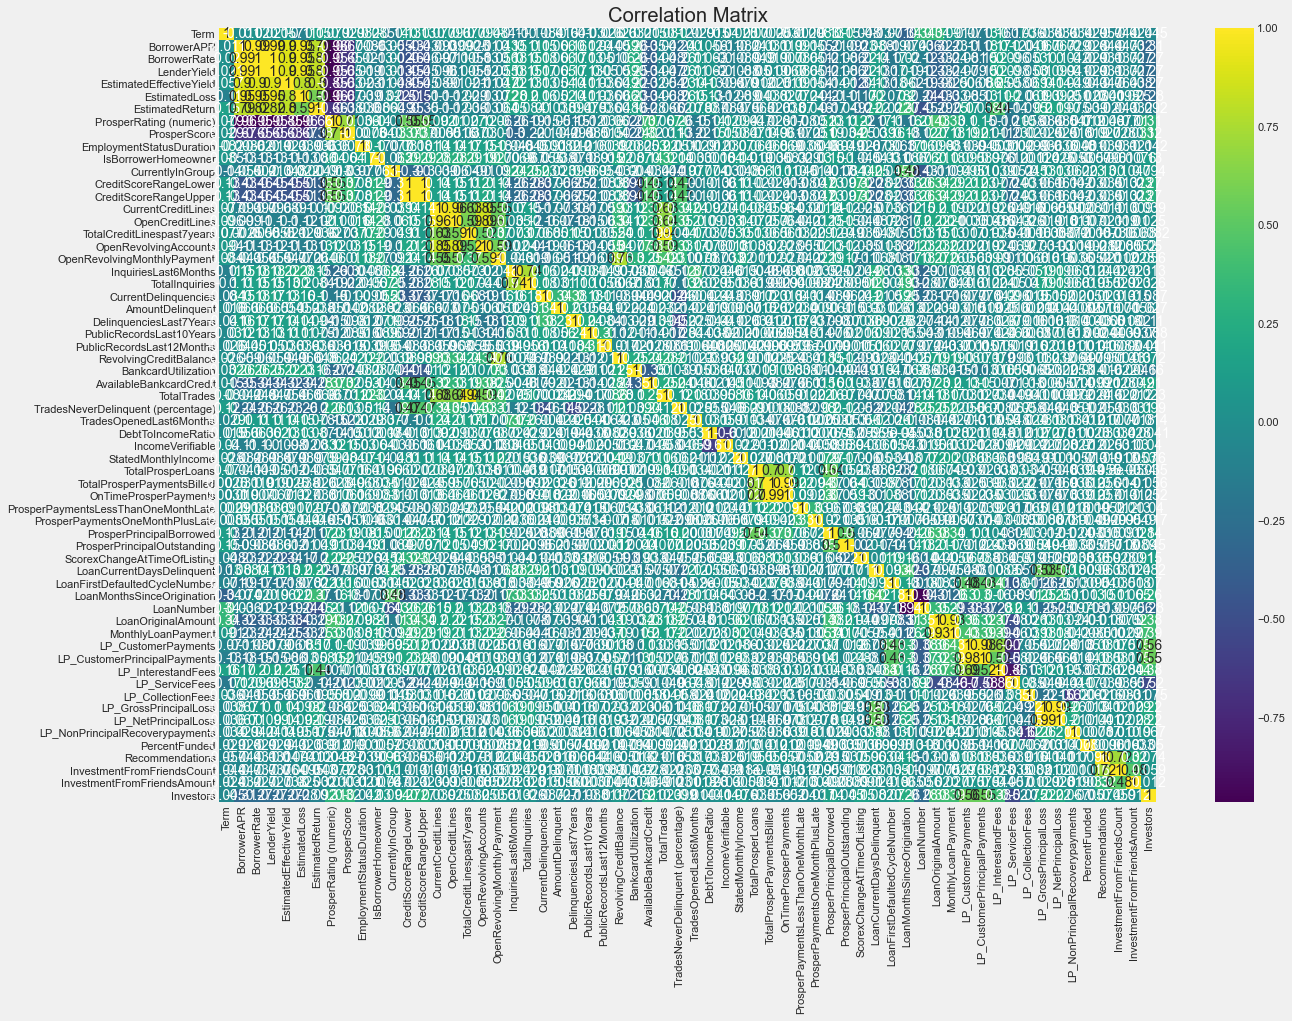

In [45]:
#Showing in a heatmap
sns.heatmap(df_corrs, cmap="viridis", annot=True)

plt.title("Correlation Matrix");

<b>There are too many correlations to view on the above heatmap, so I will take six that I am interested in and examine them instead.<b>

In [46]:
interested_columns = ['CreditScoreRangeUpper', 'LoanOriginalAmount', 'CurrentCreditLines', 
                    'ProsperRating (numeric)', 'BorrowerAPR', 'StatedMonthlyIncome']


In [47]:
interested_columns_corr = df[interested_columns].corr()

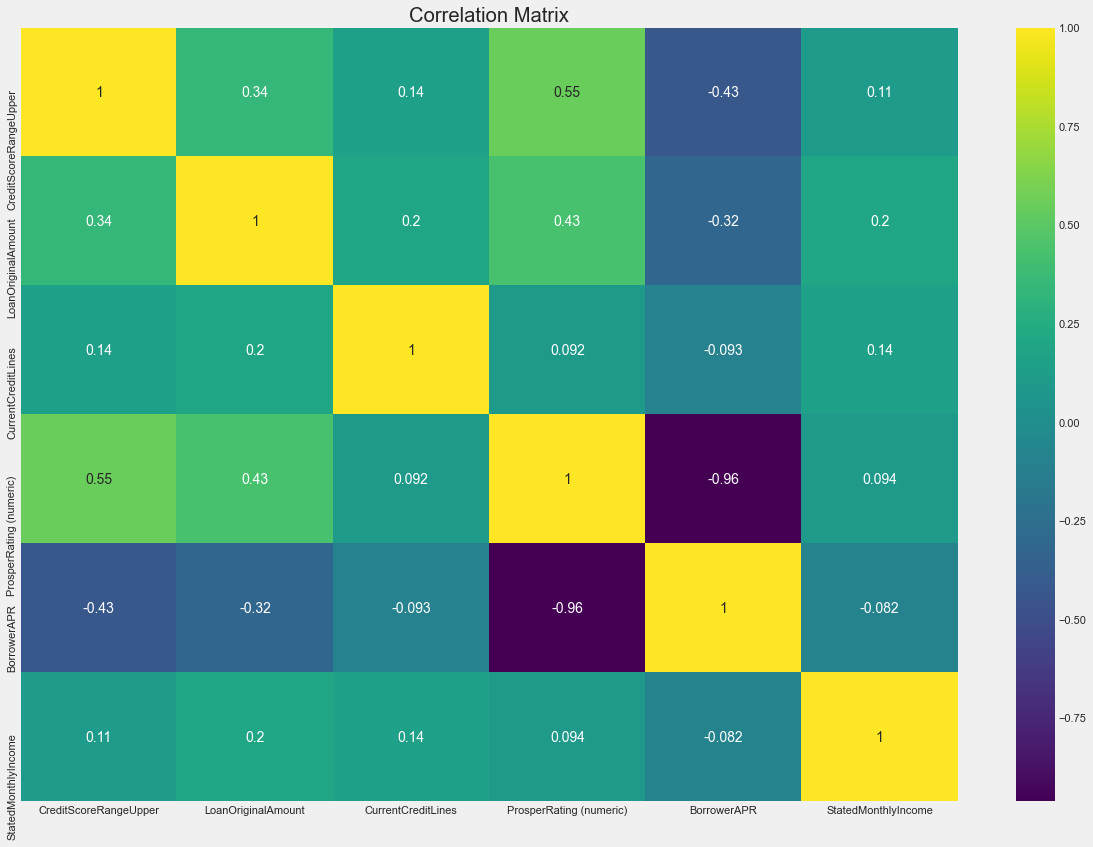

In [48]:
#Showing in a heatmap
sns.heatmap(interested_columns_corr, cmap="viridis", annot=True)

plt.title("Correlation Matrix");

<b> We can see a significant relationship between the Numeric Prosper Rating which is negative with the borrows APR, so the higher the Rating, the lower the APR. This makes sense as the rating is essentially an internal credit rating of how good the borrower is. And so borrows that are more risky with a lower Prosper Rating are given higher Interest rates/APR's to compensate for taking on that risk. 
    
There is a positive correlation with the customers upper credit score range and the Prosper Rating of 0.55 too, showing they are positively correlated suggesting that credit score could play an important role in a customers Prosper Rating.
    
We can see that the 'loan original amount' is also 0.43 correlated with the Prosper Rating, so perhaps customers with a higher rating are able to borrow more.

Surprsingly Stated Income was barely related suggesting Prosper doesn't consider it relevant or could expect customers to be dishonest in supplying that information. 

Borrower APR has a negative correlation with Upper Credit Score again likely as these people are higher risk and so are charged more to borrow by banks.</b> 

<b> Next I will explore a linear Regression on the factors that I think will affect the Prosper Rating. </b>

In [49]:
selected_columns_prosper = df[["ProsperRating (numeric)","IsBorrowerHomeowner", 'EmploymentStatus', 'EmploymentStatusDuration',
                            'DebtToIncomeRatio', 'StatedMonthlyIncome', 'CreditScoreRangeUpper']]

pros_rate_df = selected_columns_prosper.copy()
pros_rate_df[['TRUE','FALSE']] = pd.get_dummies(pros_rate_df['IsBorrowerHomeowner'])
pros_rate_df[['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired']] = pd.get_dummies(pros_rate_df['EmploymentStatus'])

pros_rate_df.head()


,ProsperRating (numeric),IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,CreditScoreRangeUpper,TRUE,FALSE,Self-employed,Employed,Not available,Full-time,Other,Not employed,Part-time,Retired
0,NaN,True,Self-employed,2.0,0.17,3083.333333,659.0,0,1,0,0,0,0,0,0,0,1
1,6.0,False,Employed,44.0,0.18,6125.000000,699.0,1,0,1,0,0,0,0,0,0,0
2,NaN,False,Not available,NaN,0.06,2083.333333,499.0,1,0,0,0,1,0,0,0,0,0
3,6.0,True,Employed,113.0,0.15,2875.000000,819.0,0,1,1,0,0,0,0,0,0,0
4,3.0,True,Employed,44.0,0.26,9583.333333,699.0,0,1,1,0,0,0,0,0,0,0


In [50]:
pros_rate_df = pros_rate_df.drop(['EmploymentStatus', 'IsBorrowerHomeowner'], 1)


In [51]:
pros_rate_df = pros_rate_df.dropna()
pros_rate_df.head()

,ProsperRating (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,CreditScoreRangeUpper,TRUE,FALSE,Self-employed,Employed,Not available,Full-time,Other,Not employed,Part-time,Retired
1,6.0,44.0,0.18,6125.000000,699.0,1,0,1,0,0,0,0,0,0,0
3,6.0,113.0,0.15,2875.000000,819.0,0,1,1,0,0,0,0,0,0,0
4,3.0,44.0,0.26,9583.333333,699.0,0,1,1,0,0,0,0,0,0,0
5,5.0,82.0,0.36,8333.333333,759.0,0,1,1,0,0,0,0,0,0,0
6,2.0,172.0,0.27,2083.333333,699.0,1,0,1,0,0,0,0,0,0,0


In [52]:
X = pros_rate_df.drop(['ProsperRating (numeric)'], axis=1)
Y = pros_rate_df['ProsperRating (numeric)']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     ProsperRating (numeric)   R-squared:                       0.350
Model:                                 OLS   Adj. R-squared:                  0.350
Method:                      Least Squares   F-statistic:                     3803.
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             19:53:11   Log-Likelihood:            -1.3254e+05
No. Observations:                    77543   AIC:                         2.651e+05
Df Residuals:                        77531   BIC:                         2.652e+05
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.3324      0.127    -49.981      0.000      -6.581      -6.084
EmploymentStatusDuration     0.0002   5.03e-05      3.816      0.000    9.33e-05       0.000
DebtToIncomeRatio           -0.5890      0.015    -38.580      0.000      -0.619      -0.559
StatedMonthlyIncome       2.903e-05   9.79e-07     29.648      0.000    2.71e-05    3.09e-05
CreditScoreRangeUpper        0.0201      0.000    188.971      0.000       0.020       0.020
TRUE                        -3.0807      0.063    -48.873      0.000      -3.204      -2.957
FALSE                       -3.2517      0.064    -50.751      0.000      -3.377      -3.126
Self-employed               -0.8102      0.177     -4.566      0.000      -1.158      -0.462
Employed                    -0.8221      0.178     -4.623      0.000      -1.171      -0.474
Not available             7.153e-16    7.7e-16      0.928      0.353   -7.95e-16    2.23e-15
Full-time                   -0.5238      1.163     -0.450      0.652      -2.803       1.756
Other                       -1.1035      0.178     -6.186      0.000      -1.453      -0.754
Not employed                -0.8440      0.195     -4.324      0.000      -1.227      -0.461
Part-time                   -1.1231      0.189     -5.953      0.000      -1.493      -0.753
Retired                     -1.1057      0.251     -4.408      0.000      -1.597      -0.614
==============================================================================
Omnibus:                     3264.585   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4042.063
Skew:                          -0.462   Prob(JB):                         0.00
Kurtosis:                       3.631   Cond. No.                     5.57e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b> Using linear regression analysis, we can see that all of these inputs other than 'Full-time' and 'Not available' for employment status are statistically significant (with a P value greater than 0.5) and therefore likely to affect the loan rating. The 0.350 Adjusted R-Squared Value suggests that these inputs account for approximately 35% of the Y variable/Prosper Rating (Numeric). </b>

<b> Next I will examine how different variables interact with each other, starting with the Prosper Rating and if they are a homeowner </b>

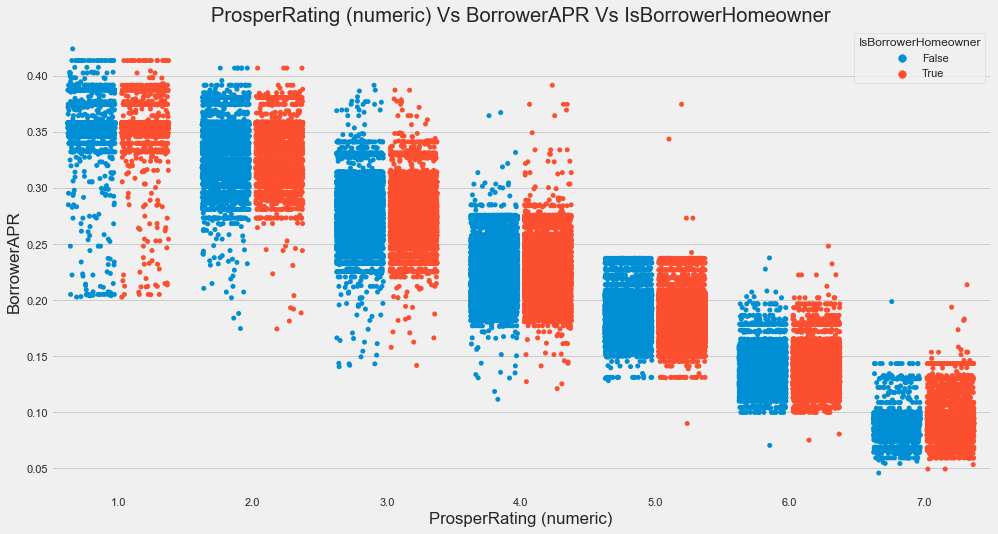

In [96]:
plt.style.use("fivethirtyeight")
df_viz_ho = df[["ProsperRating (numeric)", "BorrowerAPR", "IsBorrowerHomeowner"]].dropna()
plt.figure(figsize=(15, 8))

sns.stripplot(data=df_viz_ho, x="ProsperRating (numeric)", y="BorrowerAPR", hue="IsBorrowerHomeowner", jitter=0.35, dodge=True).set(title='ProsperRating (numeric) Vs BorrowerAPR Vs IsBorrowerHomeowner');

<b> We can see from the stripplot graph showing the density of homeowners Vs non-homeowners that for the lowest Rating's 1 and 2 and higher Borrower APR, there are less red dot density, and therefore less homeowners which would make sense as homeowners are seen as less risky and so would be given a lower score (and pay higehr interest). And at the top end of the scale at 6 and especially 7 we can see from higher density that more are Homeowners which makes sense as we would expect them to be the safest customers with higher incomes and less debt. However throughout the rest of the scale in the middle sections it is not so clear so the other factors (e.g. employment status, credit score etc.) are more important. We can also see the interaction between Borrower APR decreasing with Prosper Rating as the customer is considered less risky.</b>

<b>Next I will explore how whether a customer's employment status interacts with the Prosper Rating and Borrow APR<b/>

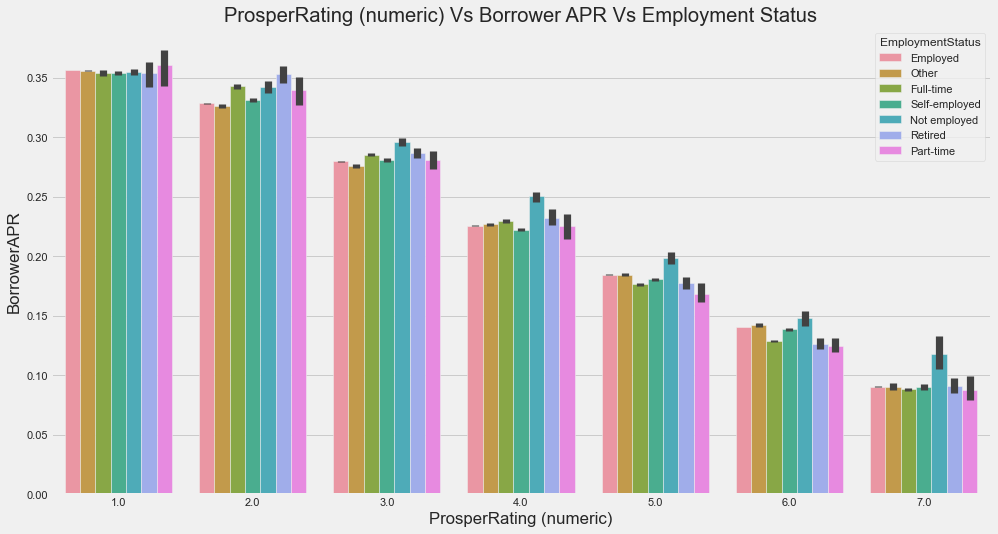

In [91]:

df_viz = df[["ProsperRating (numeric)", "BorrowerAPR", "EmploymentStatus"]].dropna()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 8))

sns.barplot(data=df_viz, x="ProsperRating (numeric)", y="BorrowerAPR", hue="EmploymentStatus").set(title='ProsperRating (numeric) Vs Borrower APR Vs Employment Status');

<b>We can see that 'Self Employed', 'Part-time' and 'Retired' are always the higher APR for each Prosper Rating, which makes sense as these would be more risky than people in more stable full-time employment with a regular source of income.</b>

<b>Next I will explore how whether a customer's stated monthly income interacts with the Loan Amount and their employemnt status. I would expect to see higher income leading to higher loan amounts as they will generally be buying more expensie things with them (for example bigger houses, better cars). <b/>

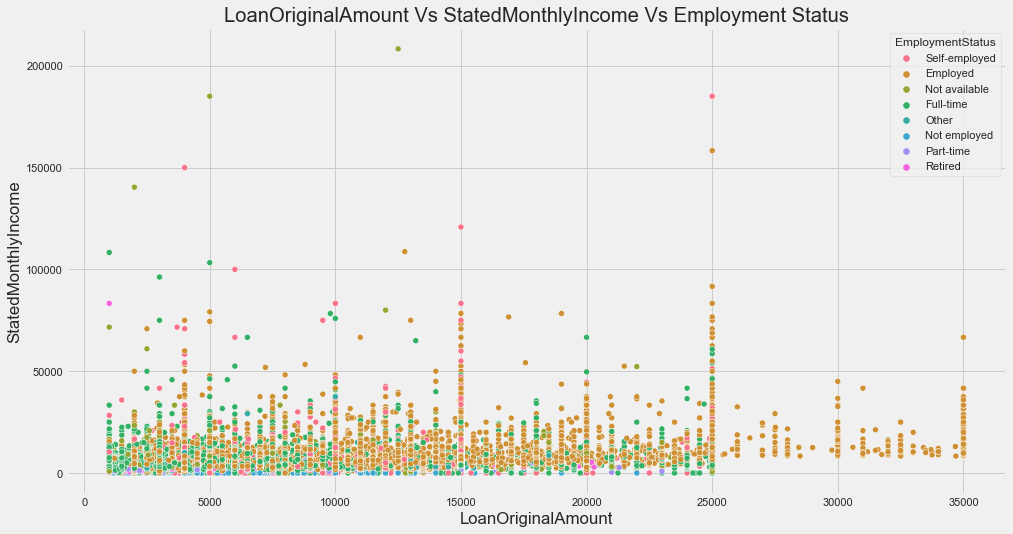

In [93]:

plt.figure(figsize=(15, 8))
inc_df = df[df["StatedMonthlyIncome"] < 250000] # Exclude some outliers
sns.scatterplot(data=inc_df, x="LoanOriginalAmount", y="StatedMonthlyIncome", hue="EmploymentStatus").set(title='LoanOriginalAmount Vs StatedMonthlyIncome Vs Employment Status');

<b> This is quite 'messy' on the chart and difficult to interperate as it's overplotted.
    
Also there are several catergories such as 'Full-time' and 'Employed' which are overlapping. Therefore I will attempy to make an 'Employed' category for people working full time. I am assuming self-employed people work full time which may not be the case though so results should be taken with caution. </b> 

In [66]:
income= df[["LoanOriginalAmount", "StatedMonthlyIncome", "EmploymentStatus"]].dropna()

In [67]:
income = income[income["StatedMonthlyIncome"] < 250000] # Exclude some outliers

In [68]:
income["EmploymentStatus"].unique().tolist()

['Self-employed',
 'Employed',
 'Not available',
 'Full-time',
 'Other',
 'Not employed',
 'Part-time',
 'Retired']

In [69]:
## Condition - either self-employed OR full-time 

condition = (income["EmploymentStatus"] == "Self-employed") | (income["EmploymentStatus"] == "Full-time")

In [70]:
## Overwrite the existing column with 'Employed' if either previous condition


income["EmploymentStatus"] = np.where(condition, "Employed", income["EmploymentStatus"])

In [71]:
#check it's worked
income["EmploymentStatus"].value_counts()

Employed         99804
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

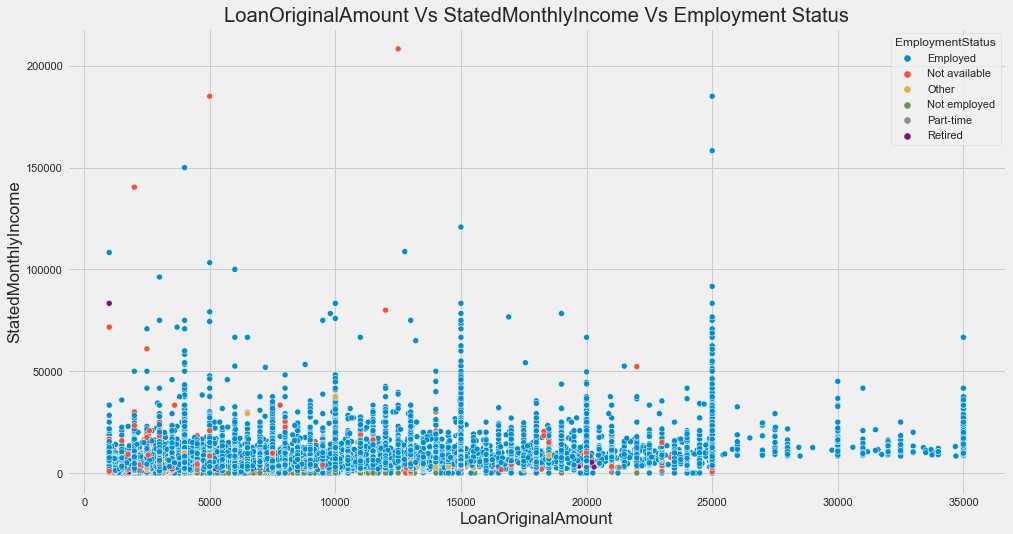

In [94]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=income, x="LoanOriginalAmount", y="StatedMonthlyIncome", hue="EmploymentStatus").set(title='LoanOriginalAmount Vs StatedMonthlyIncome Vs Employment Status');

<b> I have solved the Employement Overlapping problem but again it is difficult to interperate as it is overplotted - therefore I will first turn the loan amounts into categorical variables of Stated Monthly Income to reduce the plots but still show the overall pattern. 
</b>

In [72]:
#Create a columns splitting the Loan Origional Amount into intervals.

income['Loan Amount'] = income['LoanOriginalAmount'].apply(lambda x: (x//5000)*5000).astype(int)

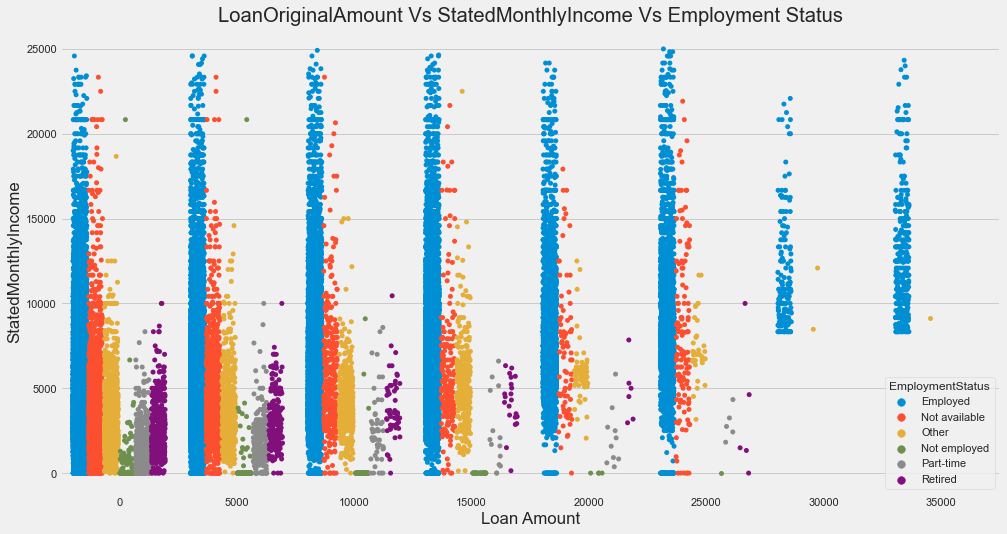

In [95]:
plt.figure(figsize=(15,8))
#omit top 0.5% of stated monthly income to remove outliers 
sns.stripplot(data=income.query('StatedMonthlyIncome < StatedMonthlyIncome.quantile(0.995)'),
                x="Loan Amount", y="StatedMonthlyIncome", hue="EmploymentStatus", dodge=True, jitter=0.35).set(title='LoanOriginalAmount Vs StatedMonthlyIncome Vs Employment Status');

<b> 
Now we can see that the vast majority of people are in employment who have loans, and other than a few 'non-available' they generally have the higher stated income which we would expect with job income.
    
Also although there is employed people all across the Loan amount, in the higher sections such as from $25,000 onwards it is almost entirely employed people, so perhaps unemployed/retired/part-time only people are blocked from getting higher amounts, or it counts significantly in the decision to give someone a loan, which we would expect as full-time employment is considered more reliable/safe. </b>
